In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\MOHAMED TAMER\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv('Salaries.csv')

In [3]:
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [5]:
data.shape

(148654, 13)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [10]:
data.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [13]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

##Totalpay->salary

In [15]:
data['TotalPay'].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

In [21]:
Range_salary=np.ptp(data['TotalPay'])
print('Range_salary:',Range_salary)

Range_salary: 568213.56


In [23]:
Std=np.std(data['TotalPay'])
print('Std:',Std)

Std: 50516.8353589452


In [27]:
data.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

##  id,employeename is unique for everyone and not affect or not carry any  weightage for data,so i will drop them,


In [28]:
data.drop(['Id','EmployeeName'],axis=1,inplace=True)

In [29]:
data.head()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [30]:
data.isnull().sum()

JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

## is see 'Notes 'doesn't have any information i will drop it

In [31]:
data.drop(['Notes'],axis=1,inplace=True)

In [32]:
data.head()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco,NaN
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,NaN
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco,NaN
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco,NaN
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco,NaN


In [33]:
data[data['Status'].isnull()==True]

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco,NaN
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,NaN
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco,NaN
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco,NaN
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...
148649,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco,NaN
148650,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco,NaN
148651,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco,NaN
148652,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco,NaN


## i observe that i have less recored attribute of status and other is nan,so i will drop it

In [34]:
data.drop(['Status'],axis=1,inplace=True)
data.head()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco


In [37]:
data[data['Benefits'].isnull()==True]

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...
36158,MANAGER IV,0.00,0.00,0.00,NaN,0.00,0.00,2011,San Francisco
148646,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148650,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco
148651,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,San Francisco


## i know that benefits is the diffrence between 'Totalpay Benefits','Totalpay',so l wil replace 'NaN' by '0'

In [38]:
data['Benefits'].fillna(0,inplace=True)
data[data['Benefits'].isnull()==True]

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency


In [39]:
data[data['BasePay'].isnull()==True]

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
81391,Deputy Chief 3,NaN,0.0,149934.11,0.00,149934.11,149934.11,2013,San Francisco
84506,Licensed Vocational Nurse,NaN,0.0,110485.41,20779.00,110485.41,131264.41,2013,San Francisco
84960,Park Patrol Officer,NaN,0.0,120000.00,8841.48,120000.00,128841.48,2013,San Francisco
90525,Police Officer 3,NaN,0.0,106079.31,0.00,106079.31,106079.31,2013,San Francisco
90786,Deputy Sheriff,NaN,0.0,81299.02,23877.53,81299.02,105176.55,2013,San Francisco
...,...,...,...,...,...,...,...,...,...
110530,Police Officer 3,NaN,0.0,0.00,-33.89,0.00,-33.89,2013,San Francisco
148646,Not provided,NaN,NaN,NaN,0.00,0.00,0.00,2014,San Francisco
148650,Not provided,NaN,NaN,NaN,0.00,0.00,0.00,2014,San Francisco
148651,Not provided,NaN,NaN,NaN,0.00,0.00,0.00,2014,San Francisco


## i observe that some data about 'Basepay 'is Nan but the person still gets 'totalpay'from other factor ,so i will make 'Baspay' as '0'here

In [40]:
data['BasePay'].fillna(0,inplace=True)

In [45]:
data[data['JobTitle']=='Not provided']

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148646,Not provided,0.0,NaN,NaN,0.0,0.0,0.0,2014,San Francisco
148650,Not provided,0.0,NaN,NaN,0.0,0.0,0.0,2014,San Francisco
148651,Not provided,0.0,NaN,NaN,0.0,0.0,0.0,2014,San Francisco
148652,Not provided,0.0,NaN,NaN,0.0,0.0,0.0,2014,San Francisco


### this rows doesn't have required information ,so i will remove it

In [48]:
data=data[data['JobTitle']!='Not provided']
data.tail()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148645,Human Services Technician,0.0,0.0,0.00,0.0,0.00,0.00,2014,San Francisco
148647,Communications Dispatcher 2,0.0,0.0,0.00,0.0,0.00,0.00,2014,San Francisco
148648,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,San Francisco
148649,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,San Francisco
148653,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,San Francisco


In [50]:
data['Agency'].value_counts()

San Francisco    148650
Name: Agency, dtype: int64

## i observe 'Agency' all values are same ,doesn't carry any weightage ,so i will drop it

In [51]:
data.drop(['Agency'],axis=1,inplace=True)

In [52]:
data.head()

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011


<AxesSubplot:>

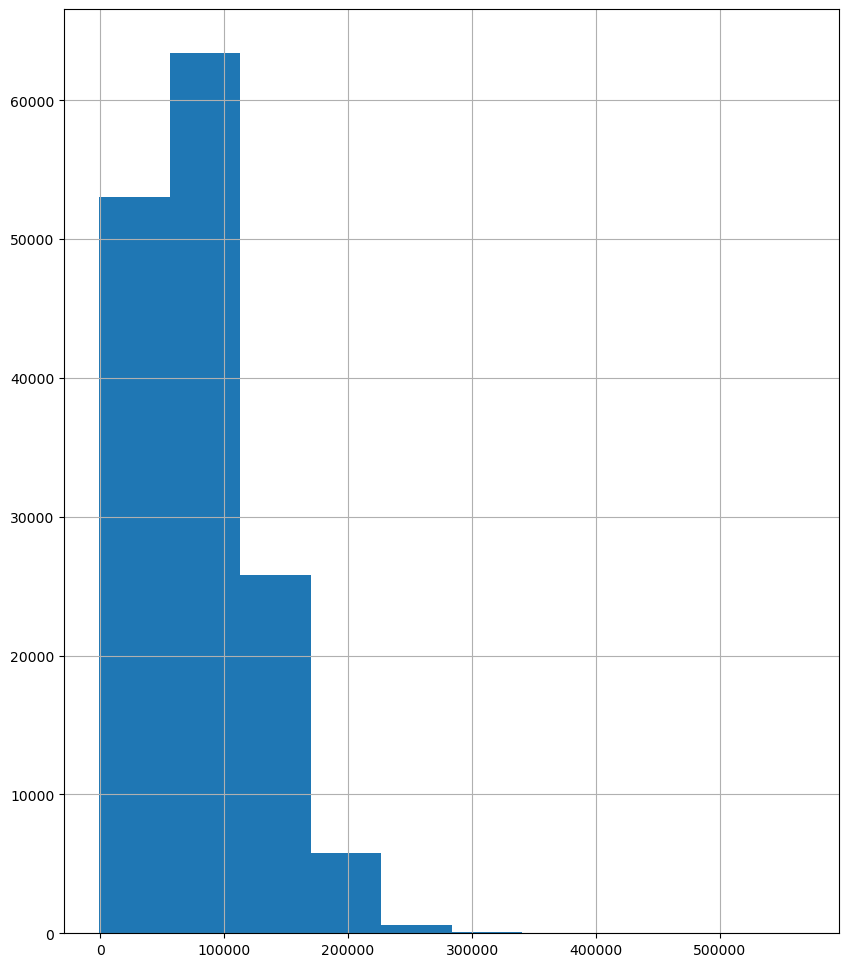

In [55]:
data['TotalPay'].hist(figsize=(10,12))

In [64]:
data['JobTitle'].value_counts()

Transit Operator                        7036
Special Nurse                           4389
Registered Nurse                        3736
Public Svc Aide-Public Works            2518
Police Officer 3                        2421
                                        ... 
BUILDING SERVICES TECHNICIAN               1
TRIAL DELAY REDUCTION COORDINATOR          1
POWERHOUSE ELECTRICIAN SUPERVISOR II       1
CHIEF NURSERY SPECIALIST                   1
Cashier 3                                  1
Name: JobTitle, Length: 2158, dtype: int64

([<matplotlib.patches.Wedge at 0x190651ad9d0>,
  ...],
 [Text(1.0878609737402936, 0.16296779379012488, 'Transit Operator'),
  Text(1.0173340066321148, 0.41836768392150964, 'Special Nurse'),
  Text(0.9308847463297069, 0.5860491353552855, 'Registered Nurse'),
  Text(0.8455308821074567, 0.7036174581422681, 'Public Svc Aide-Public Works'),
  Text(0.7676173873574927, 0.7878854908084404, 'Police Officer 3'),
  Text(0.6831714646488066, 0.8621349951658409, 'Custodian'),
  Text(0.5922332614156528, 0.9269626551663122, 'TRANSIT OPERATOR'),
  Text(0.49641484251351703, 0.9816171881809529, 'Firefighter'),
  Text(0.4046343860197305, 1.0228738991930706, 'Recreation Leader'),
  Text(0.31869158467445324, 1.0528227172025146, 'Patient Care Assistant'),
  Text(0.23143087525045303, 1.0753788867096143, 'Deputy Sheriff'),
  Text(0.1534203807486982, 1.089248450433107, 'Police Officer'),
  Text(0.08692495166541589, 1.0965600999388794, 'SPECIAL NURSE'),
  Text(0.023547999711077412, 1.0997479218937434, 'Public Se

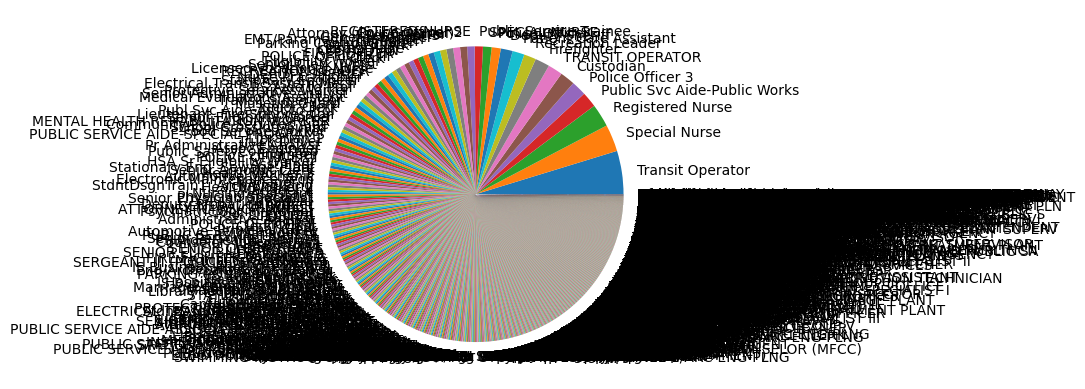

In [63]:
plt.pie(data['JobTitle'].value_counts(),labels=data['JobTitle'].value_counts().index)

In [67]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   JobTitle          148650 non-null  object 
 1   BasePay           148650 non-null  float64
 2   OvertimePay       148650 non-null  float64
 3   OtherPay          148650 non-null  float64
 4   Benefits          148650 non-null  float64
 5   TotalPay          148650 non-null  float64
 6   TotalPayBenefits  148650 non-null  float64
 7   Year              148650 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 10.2+ MB


In [83]:
data.groupby('JobTitle')['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits','Year'].describe()

C:\Users\MOHAMED TAMER\AppData\Local\Temp\ipykernel_15428\3657578832.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('JobTitle')['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits','Year'].describe()


BasePay                \
                                                 count          mean   
JobTitle                                                               
ACCOUNT CLERK                                     83.0  43300.806506   
ACCOUNTANT                                         5.0  46643.172000   
ACCOUNTANT INTERN                                 48.0  28732.663958   
ACPO,JuvP, Juv Prob (SFERS)                        1.0  62290.780000   
ACUPUNCTURIST                                      1.0  66374.400000   
...                                                ...           ...   
X-RAY LABORATORY AIDE                             26.0  47664.773077   
X-Ray Laboratory Aide                            100.0  46086.387100   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS     1.0  52609.910000   
Youth Comm Advisor                                 4.0  39077.957500   
ZOO CURATOR                                        1.0  43148.000000   

                                                                        \
                                                         std       min   
JobTitle                                                                 
ACCOUNT CLERK                                   12890.631740    614.00   
ACCOUNTANT                                      27703.019579      0.00   
ACCOUNTANT INTERN                               20635.668379   2981.53   
ACPO,JuvP, Juv Prob (SFERS)                              NaN  62290.78   
ACUPUNCTURIST                                            NaN  66374.40   
...                                                      ...       ...   
X-RAY LABORATORY AIDE                           17300.039056   4690.68   
X-Ray Laboratory Aide                           20467.891506   1007.00   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS           NaN  52609.91   
Youth Comm Advisor                              19974.143972  13915.80   
ZOO CURATOR                                              NaN  43148.00   

                                                                       \
                                                       25%        50%   
JobTitle                                                                
ACCOUNT CLERK                                   42962.4700  49777.780   
ACCOUNTANT                                      42522.3000  60076.240   
ACCOUNTANT INTERN                                9940.0000  16806.755   
ACPO,JuvP, Juv Prob (SFERS)                     62290.7800  62290.780   
ACUPUNCTURIST                                   66374.4000  66374.400   
...                                                    ...        ...   
X-RAY LABORATORY AIDE                           49930.6175  54066.080   
X-Ray Laboratory Aide                           25886.6625  55251.635   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  52609.9100  52609.910   
Youth Comm Advisor                              27792.0150  42425.650   
ZOO CURATOR                                     43148.0000  43148.000   

                                                                      \
                                                       75%       max   
JobTitle                                                               
ACCOUNT CLERK                                   49777.8100  60838.20   
ACCOUNTANT                                      65225.3100  65392.01   
ACCOUNTANT INTERN                               53789.8000  58501.72   
ACPO,JuvP, Juv Prob (SFERS)                     62290.7800  62290.78   
ACUPUNCTURIST                                   66374.4000  66374.40   
...                                                    ...       ...   
X-RAY LABORATORY AIDE                           60053.5900  60086.62   
X-Ray Laboratory Aide                           64197.3650  66123.01   
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  52609.9100  52609.91   
Youth Comm Advisor                              53711.5925  57544.73   
ZOO CURATOR                               

In [85]:
data.groupby('JobTitle').TotalPay.mean()

JobTitle
ACCOUNT CLERK                                     44035.664337
ACCOUNTANT                                        47429.268000
ACCOUNTANT INTERN                                 29031.742917
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     67594.400000
                                                      ...     
X-RAY LABORATORY AIDE                             52705.880385
X-Ray Laboratory Aide                             50823.942700
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    53632.870000
Youth Comm Advisor                                41414.307500
ZOO CURATOR                                       66686.560000
Name: TotalPay, Length: 2158, dtype: float64

<AxesSubplot:>

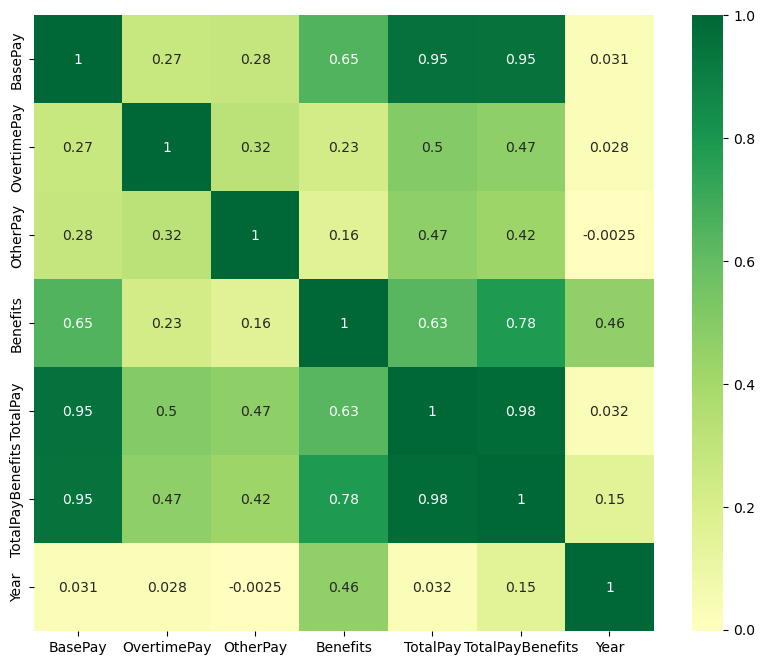

In [91]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',center=0)

Text(0, 0.5, 'TotalPayBenefits')

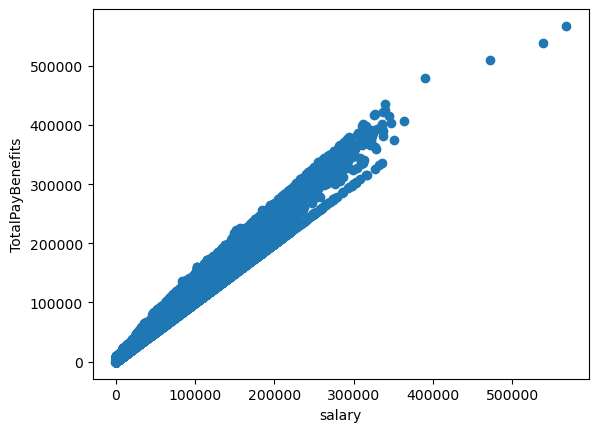

In [93]:
plt.scatter(data['TotalPay'],data['TotalPayBenefits'])
plt.xlabel('salary')
plt.ylabel('TotalPayBenefits')

Text(0, 0.5, 'BasePay')

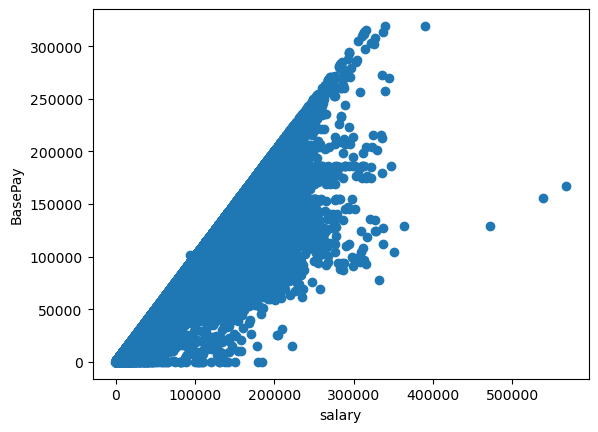

In [94]:
plt.scatter(data['TotalPay'],data['BasePay'])
plt.xlabel('salary')
plt.ylabel('BasePay')

###
this data about salary of various employee in diffrent companies ,data include some feature such as 'overtime,otherpay,basebay' will show how this feature affect(increases) totalpay(salary)
then will bulid model to fit into the data.